# Домашнее задание №1

**Выполнила:** Набережных Дарина Денисовна

**Группа:** НПМбд-01-19

**Задача:**

Дана сложная математическая функция  $ f(x) = \sin\frac{x}{5}e^\frac{x}{10} + 5e^{-\frac{x}{2}} $ на отрезке $ x\in[1,15] $. 

In [1]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

Необходимо приблизить сложную зависимость с помощью функции из опеределенного семейства, здесь мы будем приближать указанную функцию с помощью многочленов вида  $w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \dots + w_{n - 1} x^{n - 1}$ 

## 1. Полиномиальная регрессия

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def compute_polynomial_coeffs(n):
    '''
    n - количество точек
    '''
    x = np.linspace(1, 15, n)
    y = f(x)
    b = y
    A = np.zeros((n, n))
    for i in range(n):
        A[:,i] = x**i
    return np.linalg.solve(A, b)

def polynome(w, x):
    n = len(w)
    result = 0
    for i in range(n):
        result += w[i] * x**i
    return result

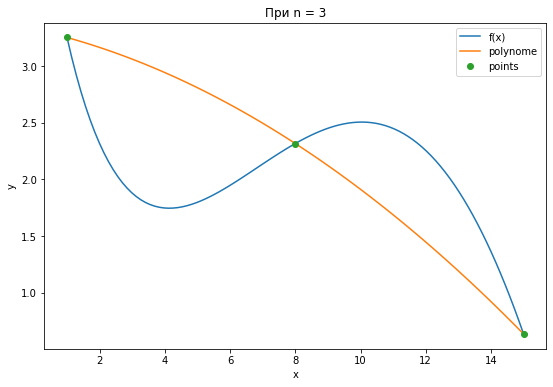

In [4]:
n = 3

w = compute_polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
x_points = np.linspace(1, 15, n)
y_points = f(x_points)

plt.figure(figsize=(9,6))
plt.plot(xx, f(xx), label='f(x)')
plt.plot(xx, polynome(w, xx), label='polynome')
plt.plot(x_points, y_points, 'o', label='points')
plt.title('При n = 3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

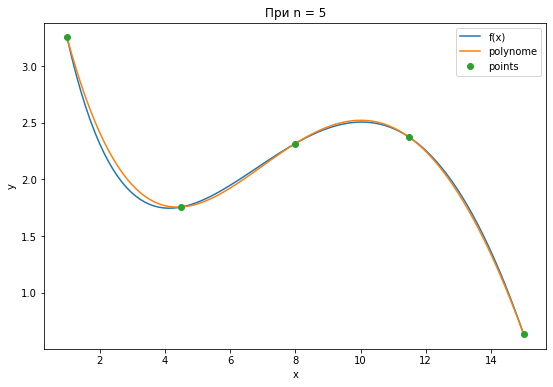

In [5]:
n = 5

w = compute_polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
x_points = np.linspace(1, 15, n)
y_points = f(x_points)

plt.figure(figsize=(9,6))
plt.plot(xx, f(xx), label='f(x)')
plt.plot(xx, polynome(w, xx), label='polynome')
plt.plot(x_points, y_points, 'o', label='points')
plt.title('При n = 5')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

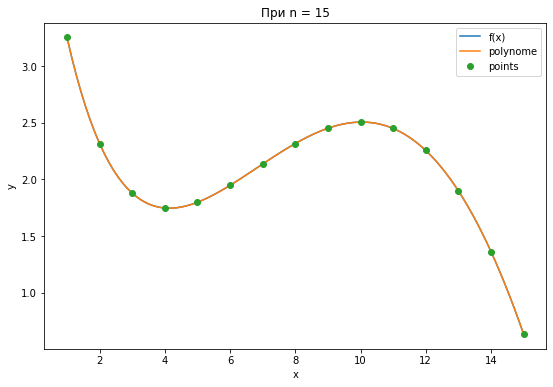

In [6]:
n = 15

w = compute_polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
x_points = np.linspace(1, 15, n)
y_points = f(x_points)

plt.figure(figsize=(9,6))
plt.plot(xx, f(xx), label='f(x)')
plt.plot(xx, polynome(w, xx), label='polynome')
plt.plot(x_points, y_points, 'o', label='points')
plt.title('При n = 15')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

С ростом степени полинома приближение все больше соответствует исходной функции, так, при n = 15 графики полинома и исходной функции почти совпадают, однако при n = 5 совпадений намного меньше.

## 2. Полиномиальная регрессия с зашумлёнными данными

Рассмотрим случай, когда значение функции $ f $ известно с некоторой неточностью. Для этого  добавим  к  значениям  функции $ f(x_i) $ случайный  шум. Шум сгенерируем из гауссового распределения с нулевым средним и стандартным отклонением $ \sigma=0.01 $. 

In [7]:
def compute_polynomial_coeffs(xx, yy):
    '''
    xx, yy - набор точек и значений неизвестной функции
    '''
    n = len(xx)
    b = yy
    A = np.zeros((n, n))
    for i in range(n):
        A[:,i] = xx**i
    return np.linalg.solve(A, b)

def polynome(w, x):
    n = len(w)
    result = 0
    for i in range(n):
        result += w[i] * x**i
    return result

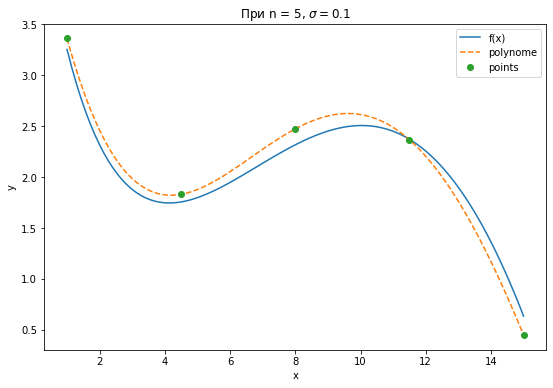

In [8]:
n = 5
noise = 0.1

x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise
w = compute_polynomial_coeffs(x_points, y_points)
xx = np.linspace(1, 15, 100)

plt.figure(figsize=(9,6))
plt.plot(xx, f(xx), label='f(x)')
plt.plot(xx, polynome(w, xx), '--', label='polynome')
plt.plot(x_points, y_points, 'o', label='points')
plt.title('При n = 5, $\sigma = 0.1$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

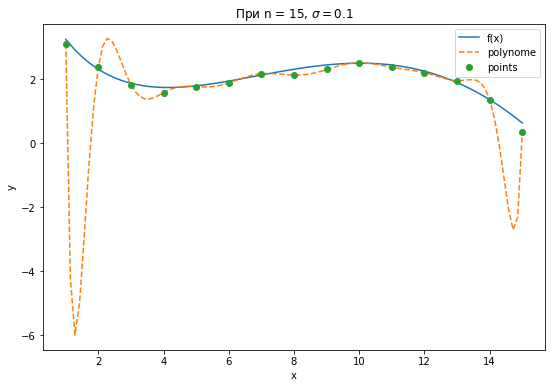

In [9]:
n = 15
noise = 0.1

x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise
w = compute_polynomial_coeffs(x_points, y_points)
xx = np.linspace(1, 15, 100)

plt.figure(figsize=(9,6))
plt.plot(xx, f(xx), label='f(x)')
plt.plot(xx, polynome(w, xx), '--', label='polynome')
plt.plot(x_points, y_points, 'o', label='points')
plt.title('При n = 15, $\sigma = 0.1$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

При увеличении n аппроксимация становится хуже. Так, при n = 5 приближение почти настолько же точно, как и при отсутствии шума, однако при n = 15 в промежутках метку точками со значениями полинома может произойти значительное отклонение от исходной функции, особенно сильно это заметно на концах графика.

Это происходит из-за того, что при появлении любой погрешности (даже небольшой) матрица А становится плохо обусловленной.

## 3. Метод наименьших квадратов

Пусть  количество  точек  равно $ N $,  а полином по-прежнему имеет вид $ a(x) = w_0 + w_1x_1 + w_2x_1^2 +  ... + w_{n-1}x_1^{n-1} $, при этом $ N > n $. 

In [10]:
def least_square_method(xx, yy, degree):
    '''
    xx, yy - набор точек и значений неизвестной функции
    degree - степень полинома
    '''
    n = len(xx)
    b = yy
    A = np.ones([n, degree + 1])
    for i in range(1, degree + 1):
        A[:, i] = xx ** i
    return np.linalg.inv(A.transpose().dot(A)).dot(A.transpose()).dot(b)

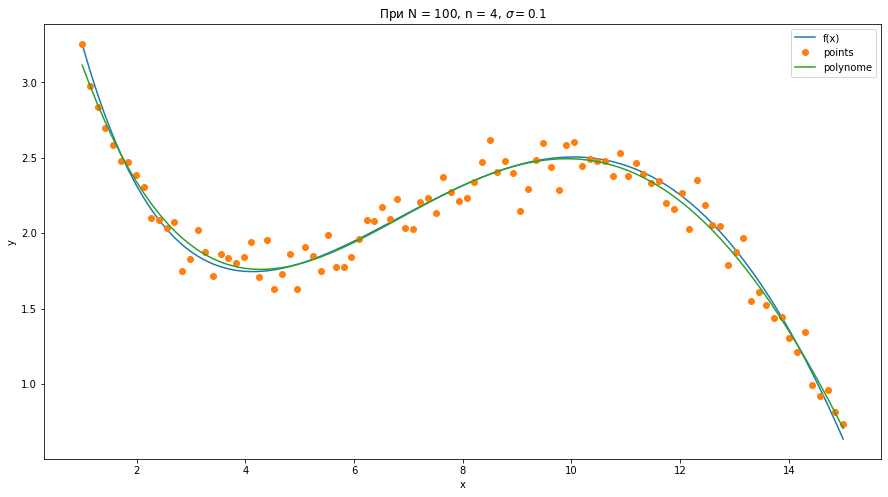

In [11]:
N = 100
n = 4
noise = 0.1
x = np.linspace(1, 15, 100)
x_points = np.linspace(1, 15, N)
y_points = f(x_points) + np.random.randn(N) * noise
w = least_square_method(x_points, y_points, n)

plt.figure(figsize=(15,8))
plt.plot(x, f(x), label = 'f(x)')
plt.plot(x_points, y_points, 'o', label = 'points')
plt.plot(x, polynome(w, x_points), label = 'polynome')
plt.title('При N = 100, n = 4, $\sigma = 0.1$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Полином четвертой степени дает достаточное приближение при применении метода наименьших квадратов, даже в присутствии шума и с небольшим количеством точек.

## Вывод

Полиномиальная регрессия хорошо справляется с аппроксимацией, однако при появлении шума аппроксимация становится хуже. При этом метод наименьших квадратов по-прежнему аппроксимирует достаточно точно.